In [1]:
from __future__ import print_function

import sys, os

import tensorflow.keras
import pandas as pd
import numpy as np
import sklearn
import keras
import csv

from sklearn.preprocessing import MinMaxScaler
from load_rh5_dataset import load_joint_space_csv_chunks, load_task_space_csv_chunks

/home/dfki.uni-bremen.de/bmanickavasakan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dfki.uni-bremen.de/bmanickavasakan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dfki.uni-bremen.de/bmanickavasakan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/d

In [66]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

TRAIN_FOLDER = '/home/dfki.uni-bremen.de/bmanickavasakan/newdataset_rh5_leg/leg_5steps/'
TEST_FOLDER = '/home/dfki.uni-bremen.de/bmanickavasakan/newdataset_rh5_leg/leg_5steps/test_4steps'

X_TRAIN_FILE = os.path.join(TRAIN_FOLDER, 'leg_forwardkinematics_x.csv')
Q_TRAIN_FILE = os.path.join(TRAIN_FOLDER, 'leg_sysstate_q.csv')

X_TEST_FILE = os.path.join(TEST_FOLDER, 'leg_forwardkinematics_x.csv')
Q_TEST_FILE = os.path.join(TEST_FOLDER, 'leg_sysstate_q.csv')

x_train = load_task_space_csv_chunks(X_TRAIN_FILE)
q_train = load_joint_space_csv_chunks(Q_TRAIN_FILE)

x_test = load_task_space_csv_chunks(X_TEST_FILE)
q_test = load_joint_space_csv_chunks(Q_TEST_FILE)


In [3]:
stats_x_train = pd.DataFrame()
stats_x_train["Mean"] = x_train.mean()
stats_x_train["Var"] = x_train.var()
stats_x_train["STD"] = x_train.std()
stats_x_train["OneSigmaMax"] = stats_x_train["Mean"] + stats_x_train["STD"]
stats_x_train["OneSigmaMin"] = stats_x_train["Mean"] - stats_x_train["STD"]
stats_x_train.T

       Mean       Var       STD  OneSigmaMax  OneSigmaMin
0 -0.152114  0.078103  0.279470     0.127355    -0.431584
1  0.307705  0.073897  0.271840     0.579545     0.035866
2 -0.723930  0.013239  0.115060    -0.608870    -0.838990
3 -0.002003  0.075206  0.274236     0.272233    -0.276240
4 -0.039421  0.076958  0.277412     0.237992    -0.316833
5  0.590720  0.024828  0.157568     0.748288     0.433152
6  0.672044  0.020872  0.144471     0.816515     0.527573
7  0.038978  0.000753  0.027432     0.066411     0.011546
8  0.013867  0.000109  0.010439     0.024306     0.003428
          0         1         2         3         4         5         6  \
0  0.398812  0.431706 -0.499640 -0.207795 -0.753744  0.415787  0.464561   
1  0.273052  0.597029 -0.465943 -0.081651 -0.790698  0.448379  0.408767   
2  0.106506  0.717667 -0.421317  0.046245 -0.810690  0.471352  0.344204   
3 -0.086611  0.783325 -0.369571  0.173150 -0.813291  0.484214  0.272257   
4 -0.289816  0.788397 -0.315122  0.296341 -0.

In [67]:
stats_q_train = pd.DataFrame()
stats_q_train["Mean"] = q_train.mean()
stats_q_train["Var"] = q_train.var()
stats_q_train["STD"] = q_train.std()
stats_q_train["OneSigmaMax"] = stats_q_train["Mean"] + stats_q_train["STD"]
stats_q_train["OneSigmaMin"] = stats_q_train["Mean"] - stats_q_train["STD"]
stats_q_train.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Mean,-0.146600,0.097600,-0.444000,-0.470338,0.048765,0.500000,-0.055575,0.037592,-0.157000,-0.157000,0.155438,0.178049,0.021066,-0.024557,0.016440,-0.008567,-0.017895,0.005354
Var,0.171943,0.115977,0.070693,0.071939,0.000882,0.125008,0.000913,0.000778,0.197205,0.197205,0.220661,0.239359,0.002930,0.000672,0.001049,0.002775,0.000713,0.001111
STD,0.414661,0.340554,0.265881,0.268215,0.029704,0.353565,0.030220,0.027890,0.444077,0.444077,0.469745,0.489243,0.054126,0.025927,0.032384,0.052676,0.026699,0.033333
OneSigmaMax,0.268061,0.438154,-0.178119,-0.202122,0.078468,0.853565,-0.025356,0.065482,0.287077,0.287077,0.625183,0.667292,0.075192,0.001370,0.048823,0.044109,0.008804,0.038687
OneSigmaMin,-0.561261,-0.242954,-0.709881,-0.738553,0.019061,0.146435,-0.085795,0.009702,-0.601077,-0.601077,-0.314308,-0.311194,-0.033060,-0.050484,-0.015944,-0.061243,-0.044594,-0.027979


In [68]:
max_std = stats_q_train["STD"].max()
colomn_max_std = stats_q_train["STD"].idxmax()
print("Max std: {:.4f} and in colomn: {:}".format(max_std, colomn_max_std))


Max std: 0.4892 and in colomn: 11


In [69]:
max = stats_q_train.loc[colomn_max_std, "Mean"] + max_std
min = stats_q_train.loc[colomn_max_std, "Mean"] - max_std
print(max, min)

0.6672923670996668 -0.31119436709965165


(15625, 18)
(3125, 18)
(3125, 18)
(9375, 18)
//////////
(3125, 9)
(3125, 9)
(9375, 9)
//////////
(4096, 18)
(1024, 18)
(1024, 18)
(2048, 18)
//est////
(1024, 9)
(1024, 9)
(2048, 9)


/home/dfki.uni-bremen.de/bmanickavasakan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/dfki.uni-bremen.de/bmanickavasakan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


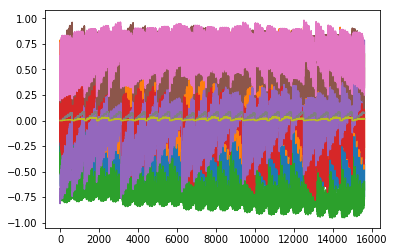

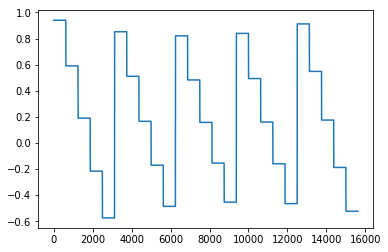

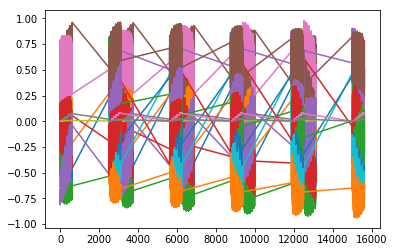

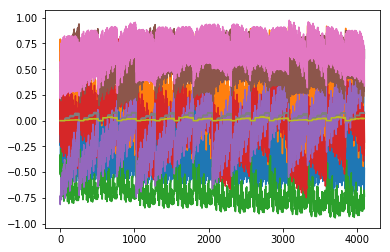

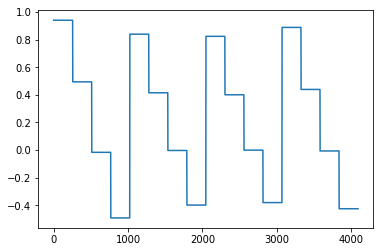

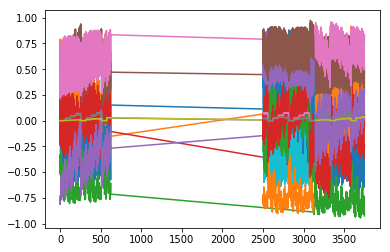

In [70]:
print(q_train.shape)
print(q_train[q_train[colomn_max_std].ge(max)].shape)
print(q_train[q_train[colomn_max_std].le(min)].shape)
print(q_train[q_train[colomn_max_std].le(max) & q_train[colomn_max_std].ge(min)].shape)
print("//////////")
print(x_train[q_train[colomn_max_std].ge(max)].shape)
print(x_train[q_train[colomn_max_std].le(min)].shape)
print(x_train[q_train[colomn_max_std].le(max) & q_train[colomn_max_std].ge(min)].shape)
print("//////////")
print(q_test.shape)
print(q_test[q_test[colomn_max_std].ge(max)].shape)
print(q_test[q_test[colomn_max_std].le(min)].shape)
print(q_test[q_test[colomn_max_std].le(max) & q_test[colomn_max_std].ge(min)].shape)
print("//est////")
print(x_test[q_test[colomn_max_std].ge(max)].shape)
print(x_test[q_test[colomn_max_std].le(min)].shape)
print(x_test[q_test[colomn_max_std].le(max) & q_test[colomn_max_std].ge(min)].shape)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_train)
plt.figure()
plt.plot(q_train[11])
plt.figure()
plt.plot(x_train[q_train[colomn_max_std].ge(max)])
plt.plot(x_train[q_train[colomn_max_std].le(min)])
plt.figure()
plt.plot(x_test)
plt.figure()
plt.plot(q_test[11])
plt.figure()
plt.plot(x_test[q_train[colomn_max_std].ge(max)])
plt.plot(x_test[q_train[colomn_max_std].le(min)])
plt.show()

(9375, 9)
(9375, 18)
(6250, 9)
(6250, 18)
###############################
(2048, 9)
(2048, 18)
(2048, 9)
(2048, 18)


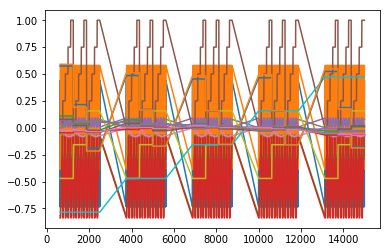

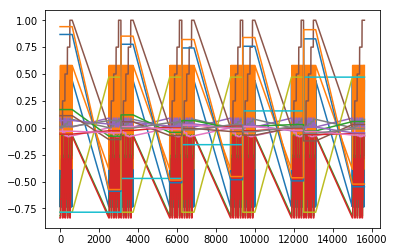

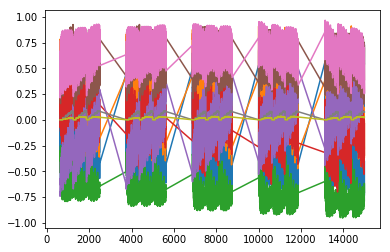

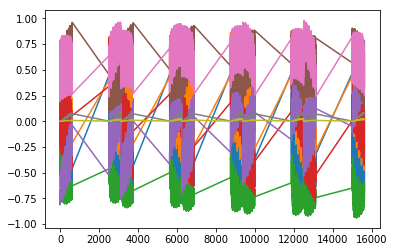

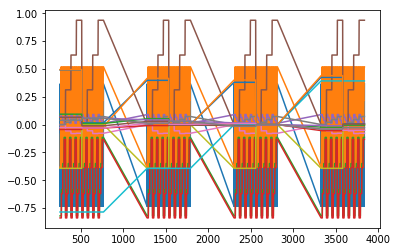

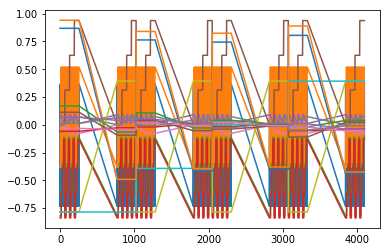

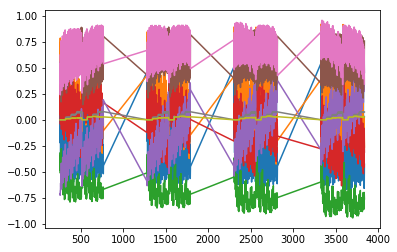

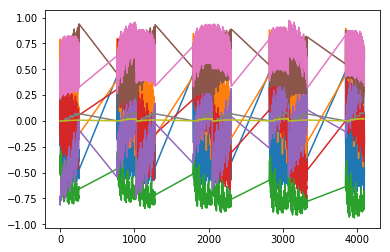

In [72]:
InDistribution_Q_Train = q_train[q_train[colomn_max_std].le(max) & q_train[colomn_max_std].ge(min)]
OutDistribution_Q_Train = q_train[q_train[colomn_max_std].ge(max) | q_train[colomn_max_std].le(min)]
InDistribution_X_Train = x_train[q_train[colomn_max_std].le(max) & q_train[colomn_max_std].ge(min)]
OutDistribution_X_Train = x_train[q_train[colomn_max_std].ge(max) | q_train[colomn_max_std].le(min)]
print(InDistribution_X_Train.shape)
print(InDistribution_Q_Train.shape)
print(OutDistribution_X_Train.shape)
print(OutDistribution_Q_Train.shape)
print('###############################')
InDistribution_Q_Test = q_test[q_test[colomn_max_std].le(max) & q_test[colomn_max_std].ge(min)]
OutDistribution_Q_Test = q_test[q_test[colomn_max_std].ge(max) | q_test[colomn_max_std].le(min)]
InDistribution_X_Test = x_test[q_test[colomn_max_std].le(max) & q_test[colomn_max_std].ge(min)]
OutDistribution_X_Test = x_test[q_test[colomn_max_std].ge(max) | q_test[colomn_max_std].le(min)]
print(InDistribution_X_Test.shape)
print(InDistribution_Q_Test.shape)
print(OutDistribution_X_Test.shape)
print(OutDistribution_Q_Test.shape)

plt.figure()
plt.plot(InDistribution_Q_Train)
plt.figure()
plt.plot(OutDistribution_Q_Train)
plt.figure()
plt.plot(InDistribution_X_Train)
plt.figure()
plt.plot(OutDistribution_X_Train)
plt.figure()
plt.plot(InDistribution_Q_Test)
plt.figure()
plt.plot(OutDistribution_Q_Test)
plt.figure()
plt.plot(InDistribution_X_Test)
plt.figure()
plt.plot(OutDistribution_X_Test)
plt.show()

In [ ]:
x_scaler = MinMaxScaler()
q_scaler = MinMaxScaler()
x_train_scaled = pd.DataFrame(x_scaler.fit_transform(x_train))
q_train = q_scaler.fit_transform(q_train)
print(x_train_scaled.shape)
print(x_train_scaled.head(10))



In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x_train_scaled[3], x_train_scaled[2])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x_train[3], x_train[2])
plt.show()